In [14]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision import datasets , transforms


In [15]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = torchvision.datasets.MNIST('Data', train = True, download = True, transform = transform)
print(train_dataset)
Data = torch.utils.data.DataLoader(train_dataset, batch_size = 512)


Dataset MNIST
    Number of datapoints: 60000
    Root location: Data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )


In [16]:
if torch.cuda.is_available():
  dev = "cuda:0"
else:
  dev = "cpu"
device = torch.device(dev) 
print(f"Using {device} device")
print(torch.cuda.get_device_name(torch.cuda.current_device()))


Using cuda:0 device
Tesla T4


In [17]:
class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.L1 = nn.Linear(28*28, 392)
    self.L2 = nn.Linear(392, 196)
    self.L3 = nn.Linear(196, 10)
  
  def forward(self, x):
    x = F.relu(self.L1(x))
    x = F.relu(self.L2(x))
    x = self.L3(x)
    return F.softmax(x, dim=1)


In [18]:
NeuralNet = Net()
NeuralNet = NeuralNet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(NeuralNet.parameters(), lr=0.02, momentum = 0.9)


In [ ]:

loss_func = []
accuracy = []

for i in range(0,30):
  for k, (images, labels) in enumerate(Data):
    images = images.view(images.shape[0], -1).to(device)
    labels = labels.to(device)
    output = NeuralNet(images)
    loss = criterion(output, labels)
    loss_func.append(float(loss))
    total = labels.size(0)
    _, predicted = torch.max(output.data , 1)
    correct = (predicted == labels).sum().item()
    acc = correct*100/total
    accuracy.append(acc)
    #guess = np.argmax(output.detach().numpy(), axis=1)
    if i%10 == 0 and k%10==0:
      print(loss)
      print(acc)
      #print(labels)
      #print(guess)
    NeuralNet.zero_grad()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


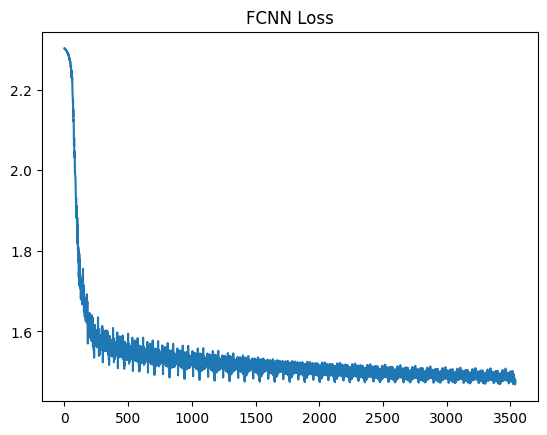

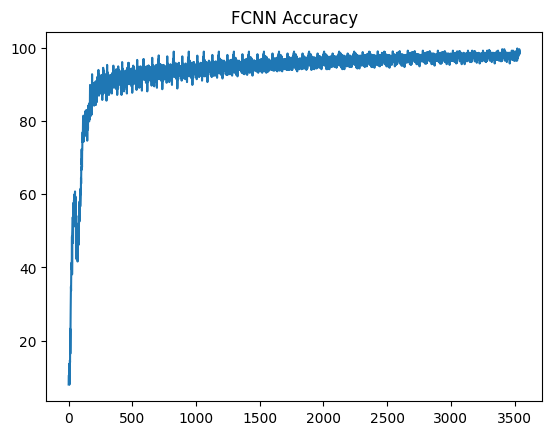

In [20]:
plt.plot(loss_func)
plt.title("FCNN Loss")
plt.show()
plt.plot(accuracy)
plt.title("FCNN Accuracy")
plt.show()